In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv("austin_weather.csv")

In [3]:
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [4]:
data.tail()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,
1318,2017-07-31,99,88,77,66,61,54,64,43,22,...,29.97,29.91,10,10,10,12,4,20,0,


In [5]:
data.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [6]:
data['DewPointHighF'] = data['DewPointHighF'].str.replace('-','')
data['DewPointAvgF'] = data['DewPointAvgF'].str.replace('-','')
data['DewPointLowF'] = data['DewPointLowF'].str.replace('-','')
data['HumidityHighPercent'] = data['HumidityHighPercent'].str.replace('-','')
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].str.replace('-','')
data['HumidityLowPercent'] = data['HumidityLowPercent'].str.replace('-','')
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].str.replace('-','')
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].str.replace('-','')
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].str.replace('-','')
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].str.replace('-','')
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].str.replace('-','')
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].str.replace('-','')
data['WindHighMPH'] = data['WindHighMPH'].str.replace('-','')
data['WindAvgMPH'] = data['WindAvgMPH'].str.replace('-','')
data['WindGustMPH'] = data['WindGustMPH'].str.replace('-','')
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].str.replace('T','')

#Changing the Column data type to the required Data type.

data['DewPointHighF'] = pd.to_numeric(data['DewPointHighF'])
data['DewPointAvgF'] = pd.to_numeric(data['DewPointAvgF'])
data['DewPointLowF'] = pd.to_numeric(data['DewPointLowF'])
data['HumidityHighPercent'] = pd.to_numeric(data['HumidityHighPercent'])
data['HumidityAvgPercent'] = pd.to_numeric(data['HumidityAvgPercent'])
data['HumidityLowPercent'] = pd.to_numeric(data['HumidityLowPercent'])
data['SeaLevelPressureHighInches'] = pd.to_numeric(data['SeaLevelPressureHighInches'])
data['SeaLevelPressureAvgInches'] = pd.to_numeric(data['SeaLevelPressureAvgInches'])
data['SeaLevelPressureLowInches'] = pd.to_numeric(data['SeaLevelPressureLowInches'])
data['VisibilityHighMiles'] = pd.to_numeric(data['VisibilityHighMiles'])
data['VisibilityAvgMiles'] = pd.to_numeric(data['VisibilityAvgMiles'])
data['VisibilityLowMiles'] = pd.to_numeric(data['VisibilityLowMiles'])
data['WindHighMPH'] = pd.to_numeric(data['WindHighMPH'])
data['WindAvgMPH'] = pd.to_numeric(data['WindAvgMPH'])
data['WindGustMPH'] = pd.to_numeric(data['WindGustMPH'])
data['PrecipitationSumInches'] = pd.to_numeric(data['PrecipitationSumInches'])

In [7]:
data.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [10]:
data.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,80.952663,70.528318,59.601014,61.310228,56.384615,50.678783,87.739645,66.272189,44.295858,30.111412,30.022096,29.931175,9.990702,9.139476,6.808115,13.191040,4.975486,21.300085,0.127380
std,14.841901,14.142399,14.343669,13.719980,14.984651,16.281365,11.193643,12.744009,17.279440,0.180415,0.172844,0.172662,0.171826,1.477979,3.756263,3.436249,2.069088,5.878959,0.450287
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,72.000000,61.000000,49.000000,52.000000,46.000000,38.000000,84.000000,59.000000,31.000000,29.990000,29.910000,29.820000,10.000000,9.000000,2.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,62.000000,66.000000,61.000000,55.000000,90.000000,66.000000,42.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,93.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,54.000000,30.210000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


In [11]:
data.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

In [13]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [14]:
data.drop(columns='Date',inplace=True)

<AxesSubplot:xlabel='PrecipitationSumInches', ylabel='Density'>

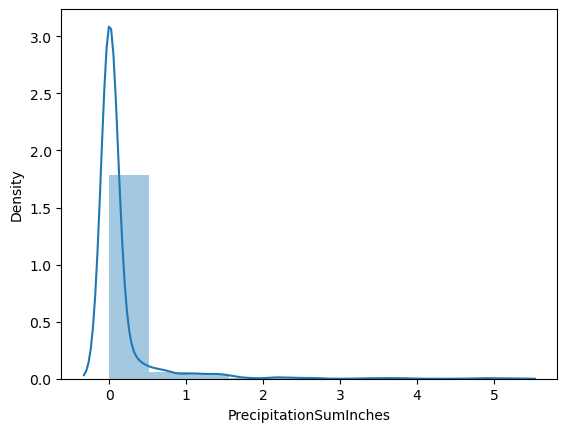

In [15]:
sns.distplot(data['PrecipitationSumInches'],bins=10)

<AxesSubplot:xlabel='PrecipitationSumInches'>

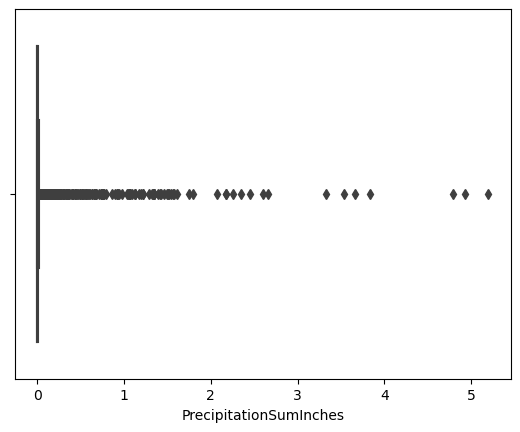

In [16]:
sns.boxplot(data['PrecipitationSumInches'])

<AxesSubplot:xlabel='Month'>

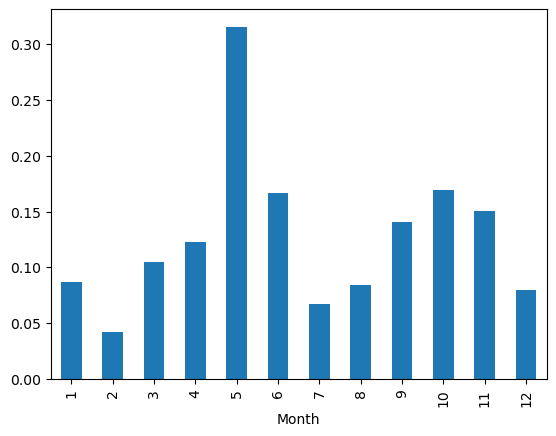

In [17]:
data.groupby('Month').mean()['PrecipitationSumInches'].plot(kind='bar')

<AxesSubplot:xlabel='Month', ylabel='PrecipitationSumInches'>

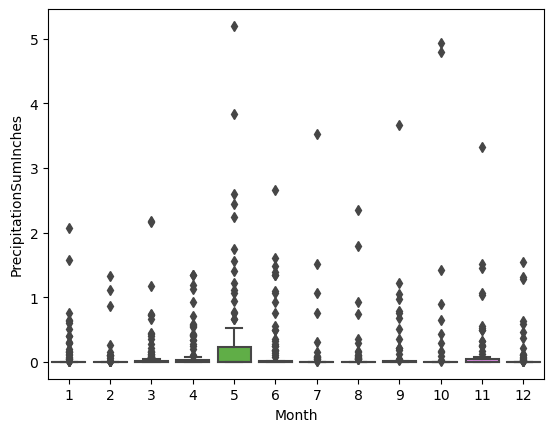

In [18]:
sns.boxplot(data['Month'],data['PrecipitationSumInches'])

In [19]:
data['TempAvgF'].dtype
num_col = [i for i in data.columns if data[i].dtype == 'int64' or data[i].dtype == 'float64']

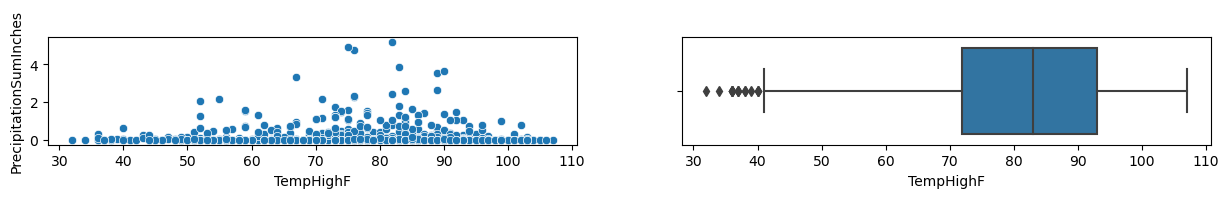

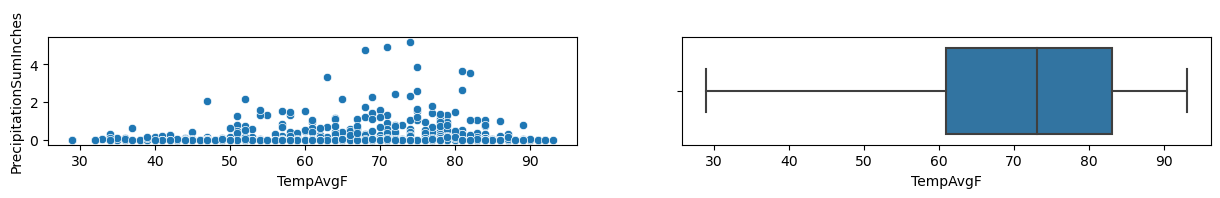

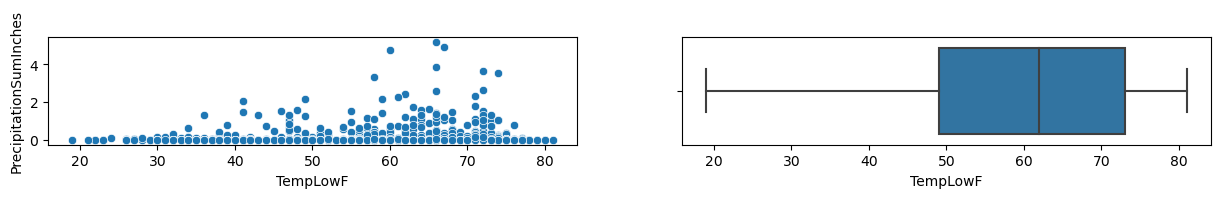

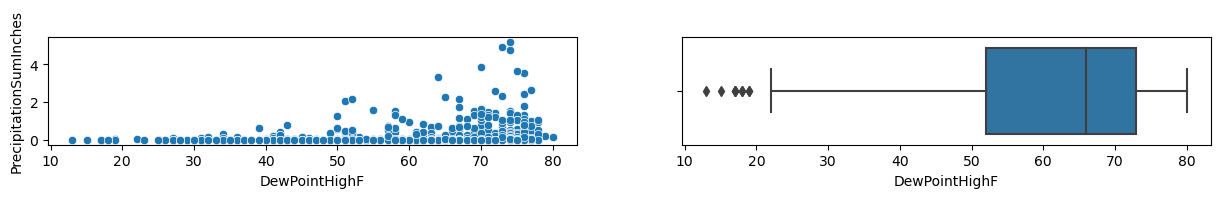

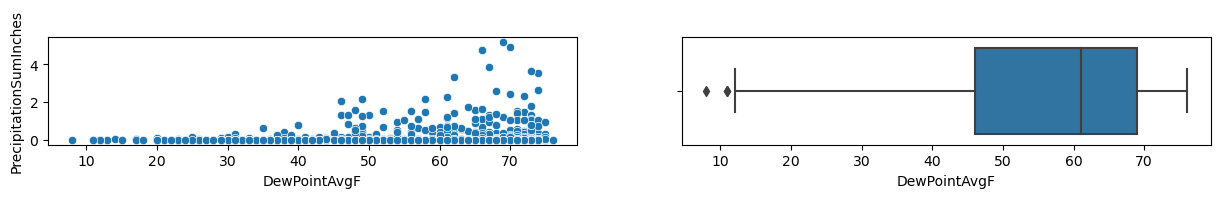

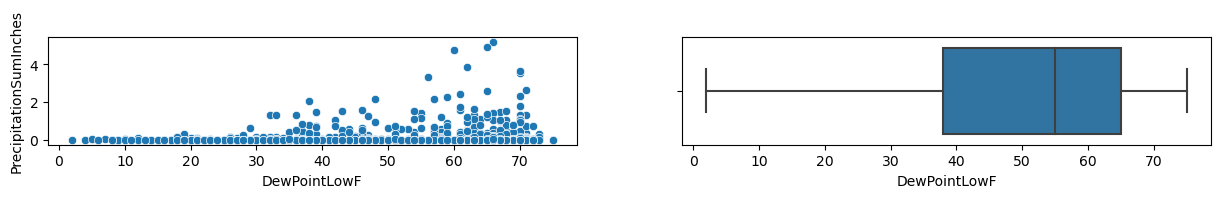

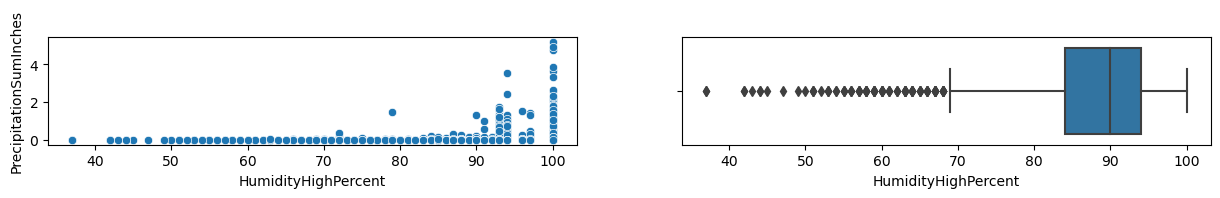

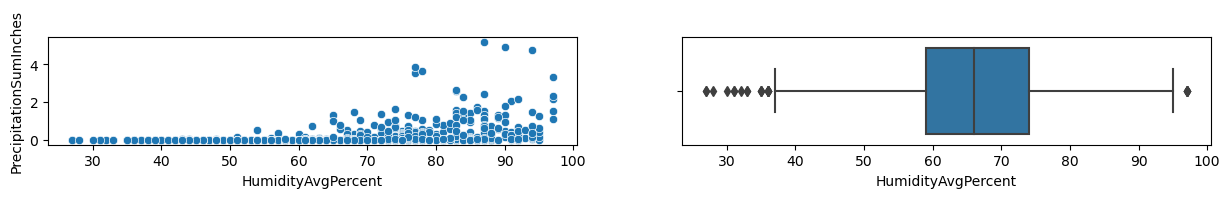

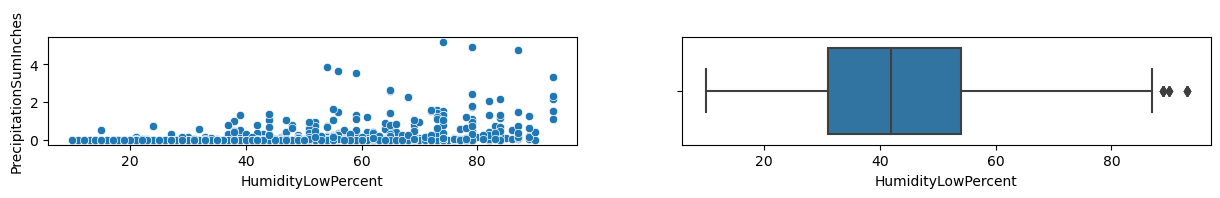

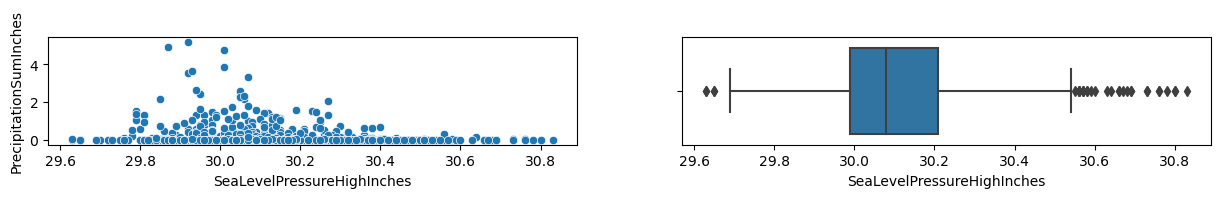

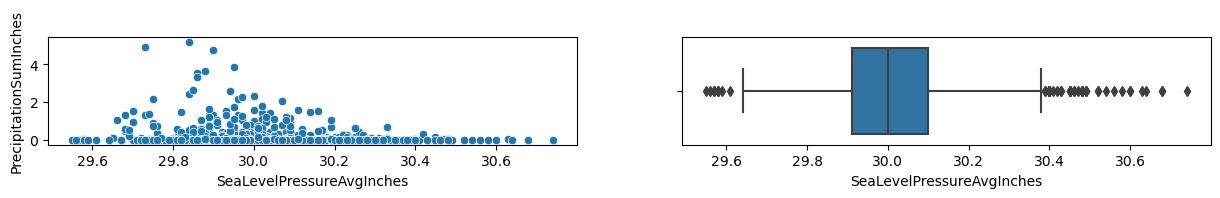

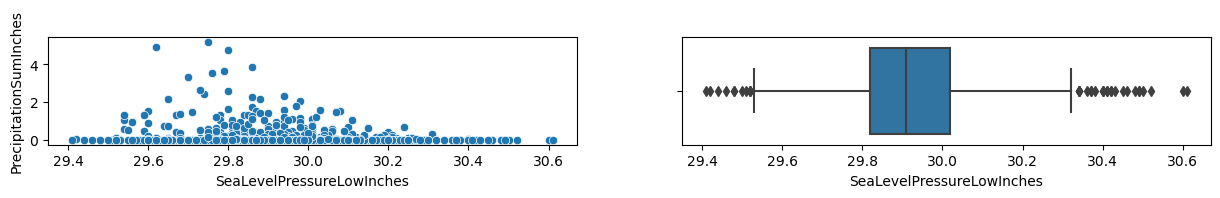

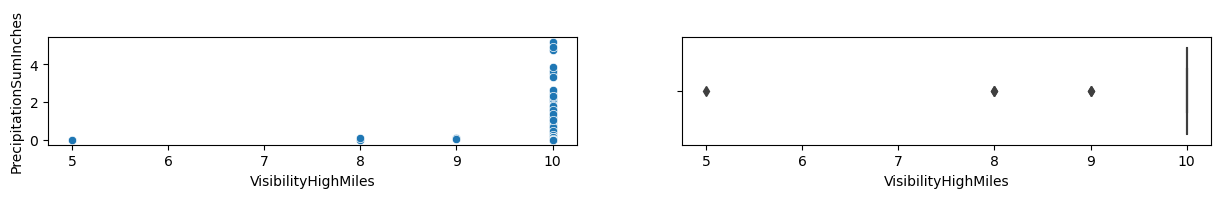

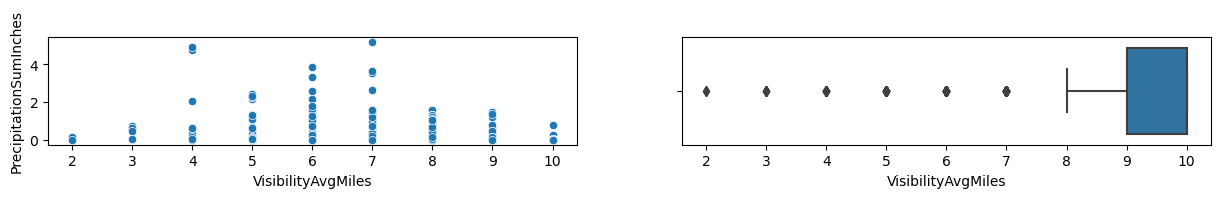

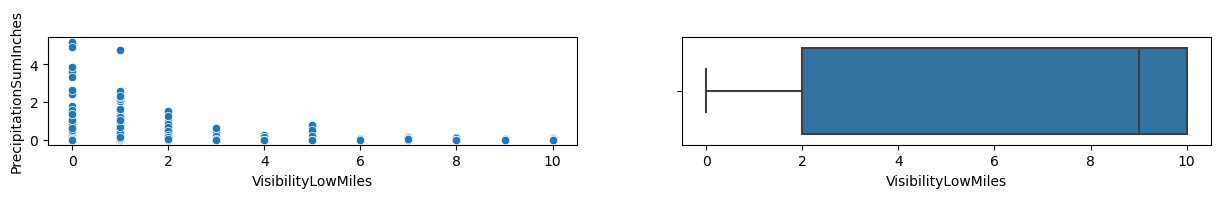

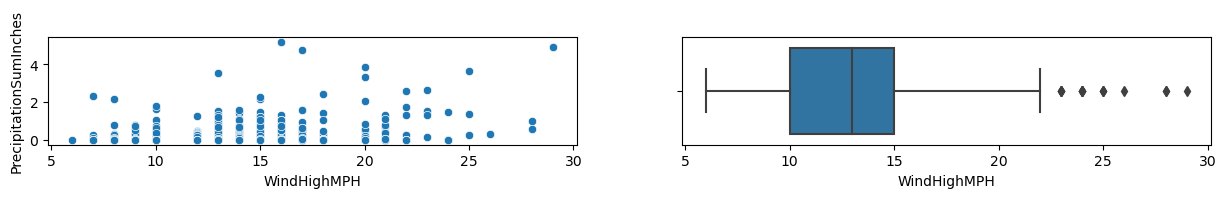

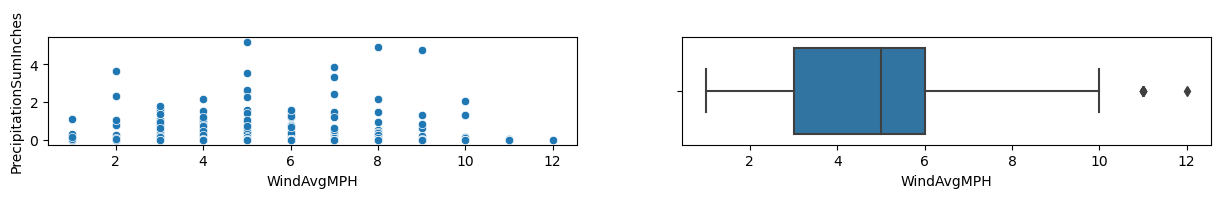

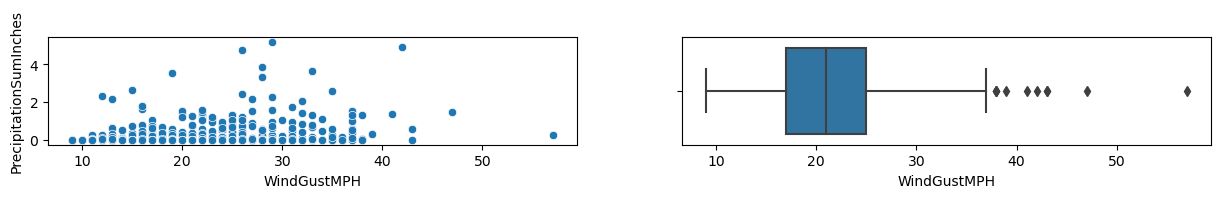

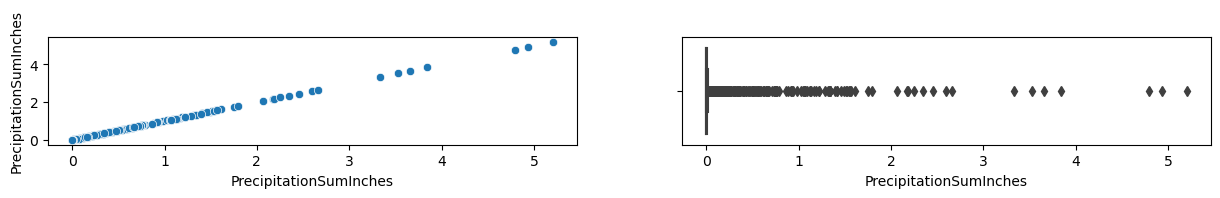

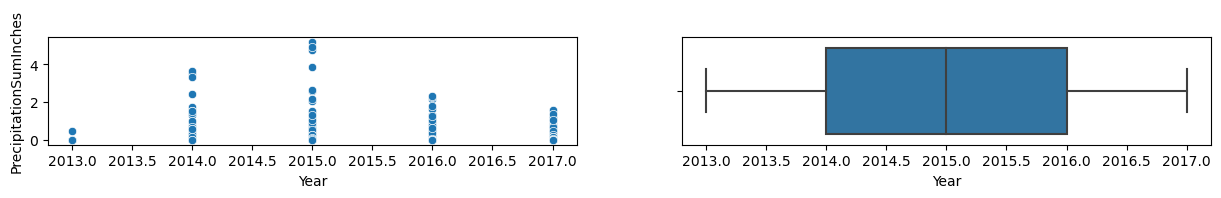

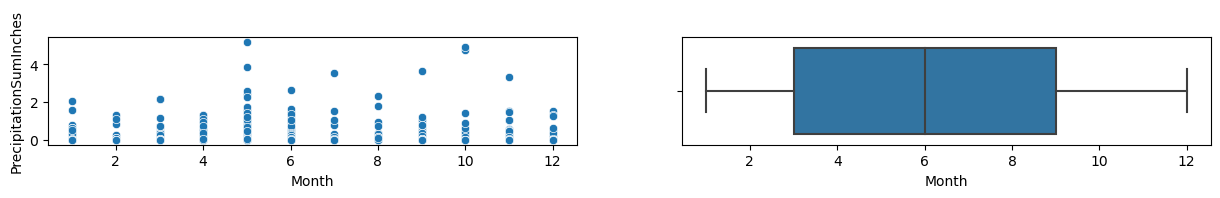

In [20]:
c = 1
for i in num_col:
    plt.figure(figsize=(15,35))
    plt.subplot(21,2,c)
    sns.scatterplot(data[i],data['PrecipitationSumInches'])
    c = c+1
    plt.subplot(21,2,c)
    sns.boxplot(data[i])
    c=c+1

In [21]:
data2 = data[['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH','PrecipitationSumInches','Events','Year','Month']]

<AxesSubplot:>

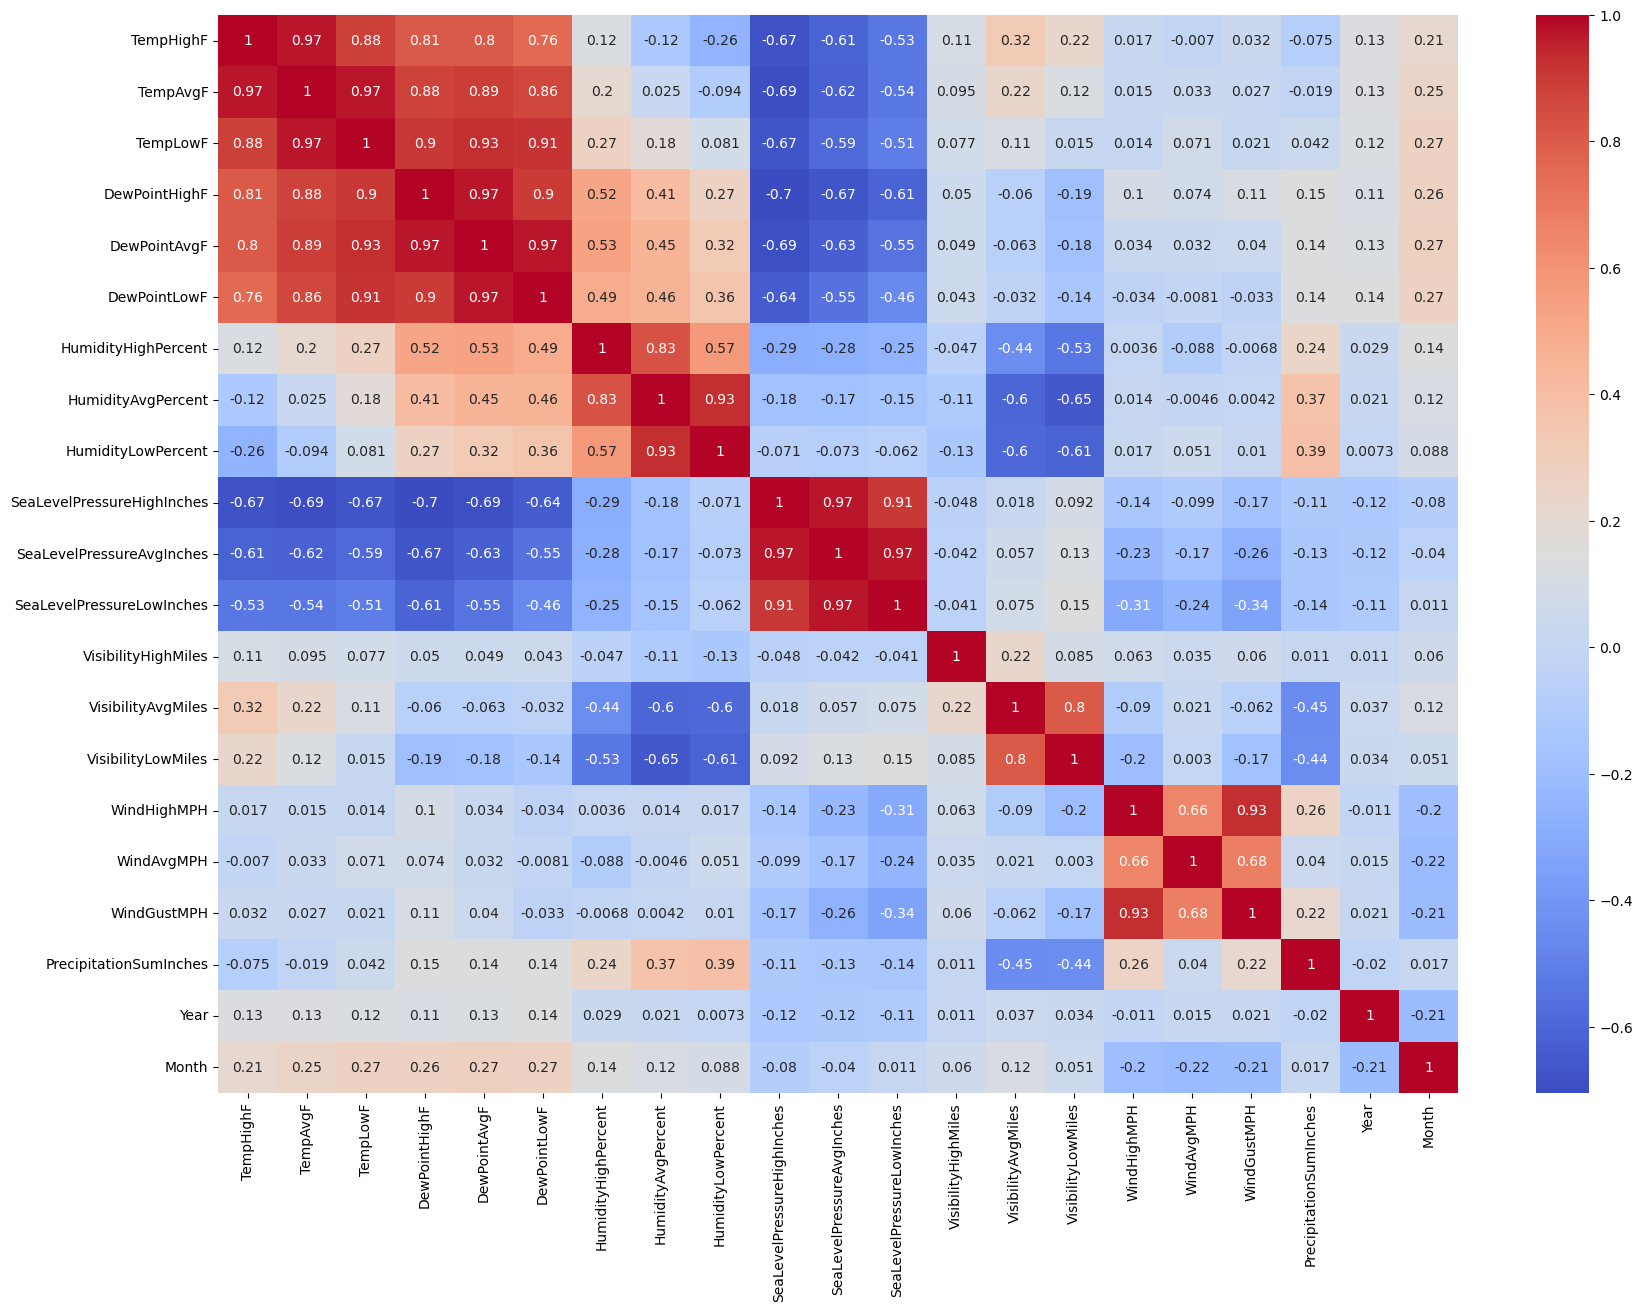

In [22]:
corrMatrix = data.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corrMatrix, annot=True,cmap='coolwarm')

In [23]:
x = data.drop(columns=['PrecipitationSumInches','Events','Year'])
y = data['PrecipitationSumInches'].values.astype('float')
y = y.reshape(-1, 1)
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [24]:
x

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Month
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,12
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,12
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,12
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,12
5,57,48,39,39.0,36.0,33.0,79.0,63.0,47.0,30.47,30.40,30.34,10.0,9.0,7.0,12.0,3.0,17.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,7
1315,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,7
1316,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,7
1317,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,7


In [25]:
y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [26]:
x_std.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Month
count,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03
mean,-2.188538e-16,-2.227954e-16,2.562053e-16,1.346251e-16,-2.501052e-17,1.576648e-17,-6.944759e-16,2.049643e-16,8.033397e-17,-1.915107e-14,8.752180e-15,1.575874e-15,3.471383e-15,-7.196272e-16,-3.459241e-16,-1.138847e-16,2.737549e-16,-1.601518e-16,5.213262e-17
std,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00
min,-3.299669e+00,-2.937683e+00,-2.831785e+00,-3.522648e+00,-3.230311e+00,-2.991111e+00,-4.534815e+00,-3.082923e+00,-1.985618e+00,-2.669481e+00,-2.732503e+00,-3.019742e+00,-2.905731e+01,-4.832610e+00,-1.813237e+00,-2.093586e+00,-1.922184e+00,-2.093106e+00,-1.511634e+00
25%,-6.034570e-01,-6.740262e-01,-7.393853e-01,-6.788760e-01,-6.933099e-01,-7.790590e-01,-3.342278e-01,-5.708772e-01,-7.697866e-01,-6.732410e-01,-6.488159e-01,-6.441595e-01,5.413795e-02,-9.440926e-02,-1.280568e+00,-9.290333e-01,-9.551656e-01,-7.317457e-01,-9.248374e-01
50%,1.380014e-01,1.748450e-01,1.673212e-01,3.419652e-01,3.081377e-01,2.655210e-01,2.020174e-01,-2.136725e-02,-1.329226e-01,-1.741811e-01,-1.278942e-01,-1.226900e-01,5.413795e-02,5.824765e-01,5.837749e-01,-5.561895e-02,1.185272e-02,-5.106541e-02,-4.464219e-02
75%,8.120545e-01,8.822376e-01,9.345344e-01,8.523858e-01,8.422432e-01,8.799799e-01,5.595142e-01,6.066442e-01,5.618380e-01,5.466831e-01,4.509077e-01,5.146615e-01,5.413795e-02,5.824765e-01,8.501095e-01,5.266573e-01,4.953619e-01,6.296149e-01,8.355530e-01
max,1.755729e+00,1.589630e+00,1.492508e+00,1.362806e+00,1.309585e+00,1.494439e+00,1.095759e+00,2.412177e+00,2.819810e+00,3.984651e+00,4.155240e+00,3.933183e+00,5.413795e-02,5.824765e-01,8.501095e-01,4.602591e+00,3.396417e+00,6.075058e+00,1.715748e+00


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((946, 19), (237, 19), (946, 1), (237, 1))

In [29]:
print(x_test.columns)

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'Month'],
      dtype='object')


In [30]:
print(x_train.columns)

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'Month'],
      dtype='object')


Multi Linear Regression


In [31]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)
y_predicted = reg_model.predict(x_test)

In [32]:
reg_model.intercept_      

array([2.45682255])

In [33]:
reg_model.coef_

array([[ 0.03418229, -0.05903165,  0.03302654,  0.00983396, -0.03026434,
         0.01278094,  0.00720386, -0.01770908,  0.01641663, -0.12562445,
        -0.08941454,  0.05716529,  0.28228637, -0.12909593, -0.00070034,
         0.04234928, -0.04148955,  0.00388066,  0.01027378]])

In [34]:

print(reg_model.score(x_train, y_train ))
print(reg_model.score(x_test, y_test))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.3443006817076545
0.19963357723188113
Mean absolute error = 0.1849228023235533
Mean squared error = 0.08204053215332008
Root Mean squared error = 0.2864271847316872
R2 score = 0.19963357723188113


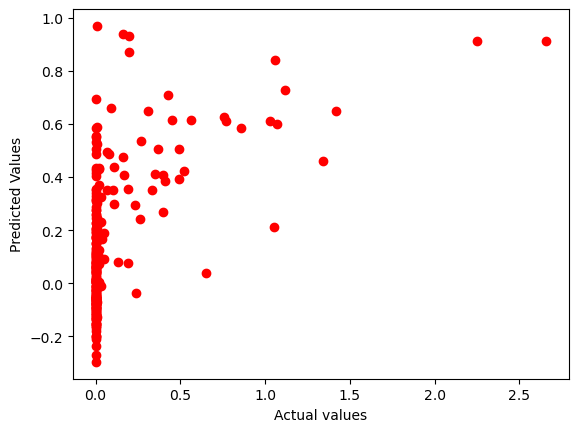

In [35]:
plt.scatter(y_test, y_predicted, c = 'red')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

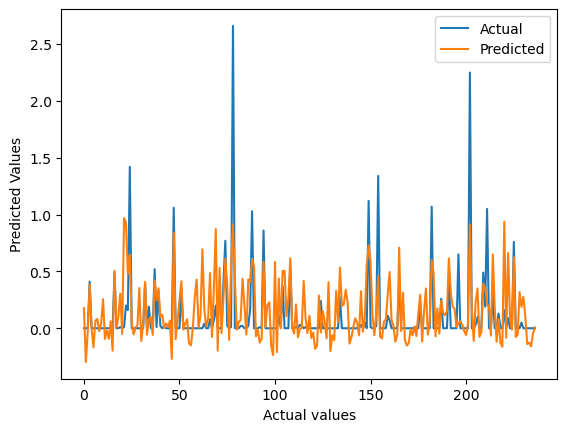

In [36]:
plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

Simple Linear Regression

In [37]:
x = data[['HumidityLowPercent']] # use only the 'TempAvgF' column as input feature
y = data['PrecipitationSumInches'].values.astype('float')
y = y.reshape(-1, 1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
y_predicted = reg_model.predict(x_test)
print(reg_model.score(x_train, y_train ))
print(reg_model.score(x_test, y_test))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.15537792155259755
0.07275943631372628
Mean absolute error = 0.18842512568756828
Mean squared error = 0.09504560300751855
Root Mean squared error = 0.30829466911952685
R2 score = 0.07275943631372628


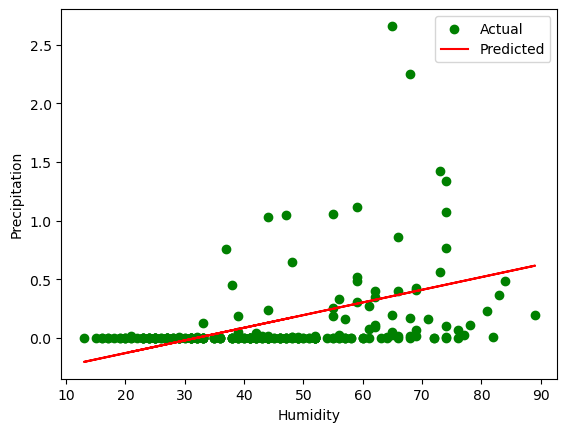

In [38]:
# Predict the precipitation values for test set
y_predicted = reg_model.predict(x_test)

# Plot actual vs predicted values in a line graph
plt.scatter( x_test,y_test, label='Actual', color='g' )
plt.plot( x_test,y_predicted, label='Predicted', color='r')
plt.xlabel('Humidity')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

Decision Tree

In [39]:
x = data.drop(columns=['PrecipitationSumInches','Events','Year'])
y = data['PrecipitationSumInches'].values.astype('float')
y = y.reshape(-1, 1)
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=5)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.6552179475024735
0.5596956931028368
Mean absolute error = 0.26328604054601673
Mean squared error = 0.22036683733011853
Root Mean squared error = 0.46943246301264524
R2 score = -0.1584216693712972


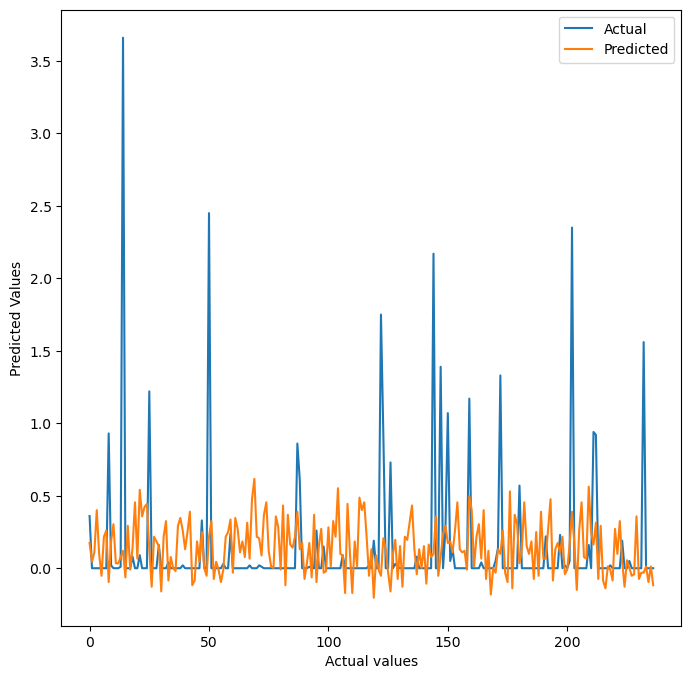

In [41]:
plt.figure(figsize=(8,8))
plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [42]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=10)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.9877409397058305
-0.8899639532841597
Mean absolute error = 0.16850073247571365
Mean squared error = 0.35952830481770476
Root Mean squared error = 0.5996067918375381
R2 score = -0.8899639532841597


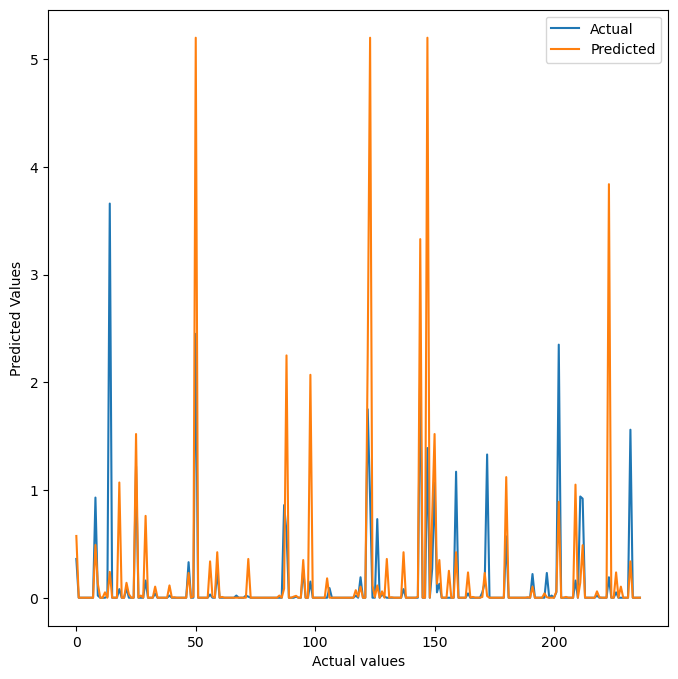

In [43]:
plt.figure(figsize=(8,8))
plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [44]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=15)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.999995631509735
-0.5869182800450414
Mean absolute error = 0.16048523206751056
Mean squared error = 0.3018798523206751
Root Mean squared error = 0.5494359401428661
R2 score = -0.5869182800450414


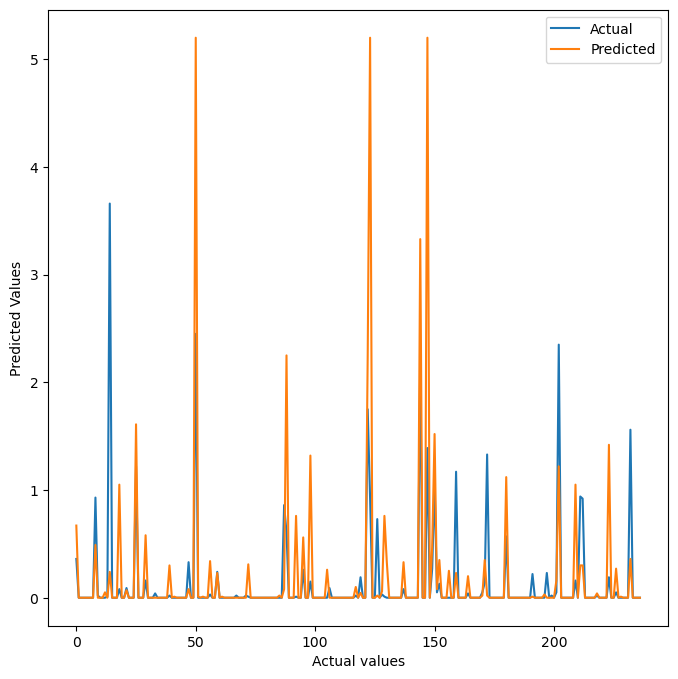

In [45]:
plt.figure(figsize=(8,8))
plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [46]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=20)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

1.0
-0.6962589086916693
Mean absolute error = 0.16856540084388186
Mean squared error = 0.32267974683544304
Root Mean squared error = 0.5680490707988554
R2 score = -0.6962589086916693


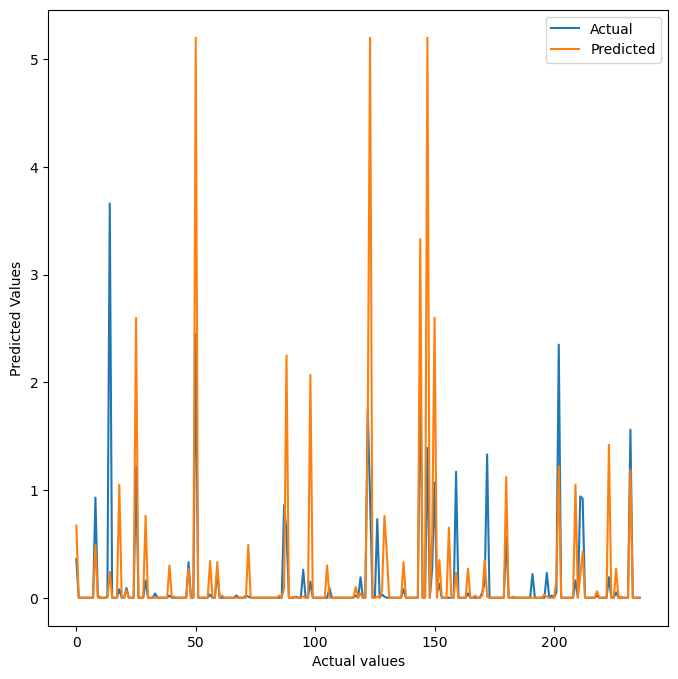

In [47]:
plt.figure(figsize=(8,8))
plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [48]:
data = data.replace('T', 0.0)
data = data.dropna()

LSTM

In [49]:
x2 = data.drop(columns=['PrecipitationSumInches','Events','Year'])
y2 = data['PrecipitationSumInches']


In [50]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [51]:
print(x2_test.columns)

Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF',
       'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent',
       'HumidityLowPercent', 'SeaLevelPressureHighInches',
       'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches',
       'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles',
       'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'Month'],
      dtype='object')


In [52]:
x2_train_mean = x2_train.mean()
x2_train_std = x2_train.std()
y2_train_mean = y2_train.mean()
y2_train_std = y2_train.std()
x2_train = (x2_train - x2_train_mean) / x2_train_std
y2_train = (y2_train - y2_train_mean) / y2_train_std
x2_test = (x2_test - x2_train_mean) / x2_train_std
y2_test = (y2_test - y2_train_mean) / y2_train_std
x2_train = np.array(x2_train)
y2_train = np.array(y2_train)
x2_test = np.array(x2_test)
y2_test = np.array(y2_test)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x2_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x2_train.reshape(x2_train.shape[0], x2_train.shape[1], 1), y_train, epochs=50, batch_size=30, verbose=1, validation_split=0.2)

Epoch 1/50
26/26 [==============================] - 11s 80ms/step - loss: 0.2308 - val_loss: 0.1110
Epoch 2/50
26/26 [==============================] - 0s 15ms/step - loss: 0.2168 - val_loss: 0.1072
Epoch 3/50
26/26 [==============================] - 0s 13ms/step - loss: 0.2089 - val_loss: 0.1048
Epoch 4/50
26/26 [==============================] - 0s 13ms/step - loss: 0.2013 - val_loss: 0.1010
Epoch 5/50
26/26 [==============================] - 0s 16ms/step - loss: 0.1894 - val_loss: 0.0995
Epoch 6/50
26/26 [==============================] - 0s 19ms/step - loss: 0.1779 - val_loss: 0.0954
Epoch 7/50
26/26 [==============================] - 0s 13ms/step - loss: 0.1665 - val_loss: 0.1165
Epoch 8/50
26/26 [==============================] - 0s 14ms/step - loss: 0.1607 - val_loss: 0.0984
Epoch 9/50
26/26 [==============================] - 0s 15ms/step - loss: 0.1533 - val_loss: 0.1040
Epoch 10/50
26/26 [==============================] - 0s 12ms/step - loss: 0.1490 - val_loss: 0.1086
Epoch 11

8/8 [==============================] - 2s 3ms/step
Mean absolute error = 0.20534891969418223
Mean squared error = 0.12079548003725624
Root Mean squared error = 0.34755644151311055
R2 score = 0.3650038121314889


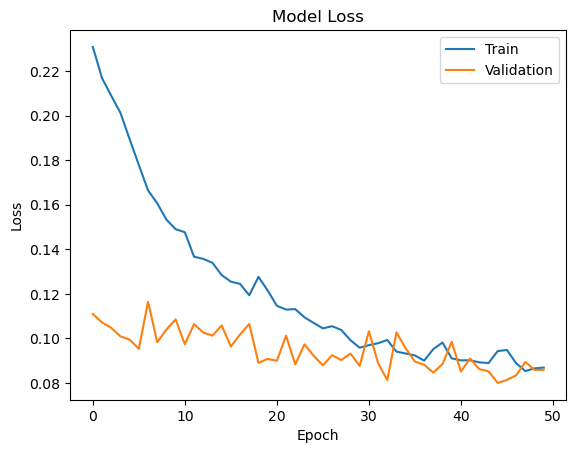

In [54]:
y2_predicted = model.predict(x2_test.reshape(x2_test.shape[0], x2_test.shape[1], 1)).flatten() * y2_train_std + y2_train_mean
y2_test = y2_test * y2_train_std + y2_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y2_test, y2_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y2_test, y2_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y2_test, y2_predicted))))
print('R2 score = ' + str(r2_score(y2_test, y2_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [55]:
model = tf.keras.Sequential([

    tf.keras.layers.LSTM(32, input_shape=(x2_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x2_train.reshape(x2_train.shape[0], x2_train.shape[1], 1), y_train, epochs=50, batch_size=60, verbose=1, validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 7s 112ms/step - loss: 0.2336 - val_loss: 0.1116
Epoch 2/50
13/13 [==============================] - 0s 14ms/step - loss: 0.2180 - val_loss: 0.1117
Epoch 3/50
13/13 [==============================] - 0s 14ms/step - loss: 0.2120 - val_loss: 0.1047
Epoch 4/50
13/13 [==============================] - 0s 14ms/step - loss: 0.2070 - val_loss: 0.1057
Epoch 5/50
13/13 [==============================] - 0s 15ms/step - loss: 0.2015 - val_loss: 0.1013
Epoch 6/50
13/13 [==============================] - 0s 14ms/step - loss: 0.1953 - val_loss: 0.1004
Epoch 7/50
13/13 [==============================] - 0s 20ms/step - loss: 0.1889 - val_loss: 0.0990
Epoch 8/50
13/13 [==============================] - 0s 16ms/step - loss: 0.1825 - val_loss: 0.0965
Epoch 9/50
13/13 [==============================] - 0s 12ms/step - loss: 0.1763 - val_loss: 0.0976
Epoch 10/50
13/13 [==============================] - 0s 16ms/step - loss: 0.1658 - val_loss: 0.1002
Epoch 11

8/8 [==============================] - 1s 2ms/step
Mean absolute error = 0.05922921017365034
Mean squared error = 0.020769484728180188
Root Mean squared error = 0.14411621951806877
R2 score = 0.4697381150545621


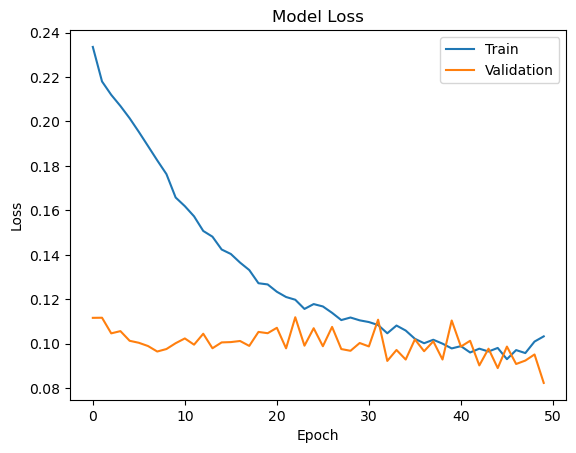

In [56]:
y2_predicted = model.predict(x2_test.reshape(x2_test.shape[0], x2_test.shape[1], 1)).flatten() * y2_train_std + y2_train_mean
y2_test = y2_test * y2_train_std + y2_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y2_test, y2_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y2_test, y2_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y2_test, y2_predicted))))
print('R2 score = ' + str(r2_score(y2_test, y2_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [57]:
model = tf.keras.Sequential([

    tf.keras.layers.LSTM(32, input_shape=(x2_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x2_train.reshape(x2_train.shape[0], x2_train.shape[1], 1), y_train, epochs=100, batch_size=30, verbose=1, validation_split=0.2)

Epoch 1/100
26/26 [==============================] - 6s 66ms/step - loss: 0.2272 - val_loss: 0.1128
Epoch 2/100
26/26 [==============================] - 0s 10ms/step - loss: 0.2153 - val_loss: 0.1050
Epoch 3/100
26/26 [==============================] - 0s 16ms/step - loss: 0.2065 - val_loss: 0.1027
Epoch 4/100
26/26 [==============================] - 0s 12ms/step - loss: 0.1979 - val_loss: 0.1004
Epoch 5/100
26/26 [==============================] - 0s 13ms/step - loss: 0.1871 - val_loss: 0.0974
Epoch 6/100
26/26 [==============================] - 0s 10ms/step - loss: 0.1797 - val_loss: 0.1003
Epoch 7/100
26/26 [==============================] - 0s 11ms/step - loss: 0.1672 - val_loss: 0.0996
Epoch 8/100
26/26 [==============================] - 0s 14ms/step - loss: 0.1524 - val_loss: 0.1027
Epoch 9/100
26/26 [==============================] - 0s 9ms/step - loss: 0.1450 - val_loss: 0.1008
Epoch 10/100
26/26 [==============================] - 0s 9ms/step - loss: 0.1397 - val_loss: 0.1089
E

8/8 [==============================] - 2s 4ms/step
Mean absolute error = 0.07660990022000184
Mean squared error = 0.020758214806687145
Root Mean squared error = 0.1440771140975802
R2 score = -1.5739431221995157


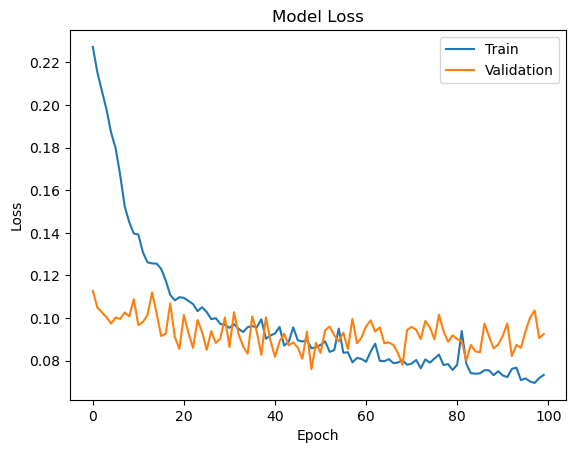

In [58]:
y2_predicted = model.predict(x2_test.reshape(x2_test.shape[0], x2_test.shape[1], 1)).flatten() * y2_train_std + y2_train_mean
y2_test = y2_test * y2_train_std + y2_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y2_test, y2_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y2_test, y2_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y2_test, y2_predicted))))
print('R2 score = ' + str(r2_score(y2_test, y2_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [59]:
model = tf.keras.Sequential([

    tf.keras.layers.LSTM(32, input_shape=(x2_train.shape[1], 1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x2_train.reshape(x2_train.shape[0], x2_train.shape[1], 1), y_train, epochs=100, batch_size=60, verbose=1, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 9s 153ms/step - loss: 0.2355 - val_loss: 0.1090
Epoch 2/100
13/13 [==============================] - 0s 14ms/step - loss: 0.2237 - val_loss: 0.1112
Epoch 3/100
13/13 [==============================] - 0s 15ms/step - loss: 0.2141 - val_loss: 0.1059
Epoch 4/100
13/13 [==============================] - 0s 14ms/step - loss: 0.2079 - val_loss: 0.1035
Epoch 5/100
13/13 [==============================] - 0s 15ms/step - loss: 0.2031 - val_loss: 0.1028
Epoch 6/100
13/13 [==============================] - 0s 18ms/step - loss: 0.1985 - val_loss: 0.1049
Epoch 7/100
13/13 [==============================] - 0s 16ms/step - loss: 0.1920 - val_loss: 0.0988
Epoch 8/100
13/13 [==============================] - 0s 17ms/step - loss: 0.1853 - val_loss: 0.1001
Epoch 9/100
13/13 [==============================] - 0s 14ms/step - loss: 0.1781 - val_loss: 0.0968
Epoch 10/100
13/13 [==============================] - 0s 16ms/step - loss: 0.1713 - val_loss: 0.095

8/8 [==============================] - 1s 5ms/step
Mean absolute error = 0.09744462706929595
Mean squared error = 0.026981604369932286
Root Mean squared error = 0.1642607815941842
R2 score = -15.248787875635724


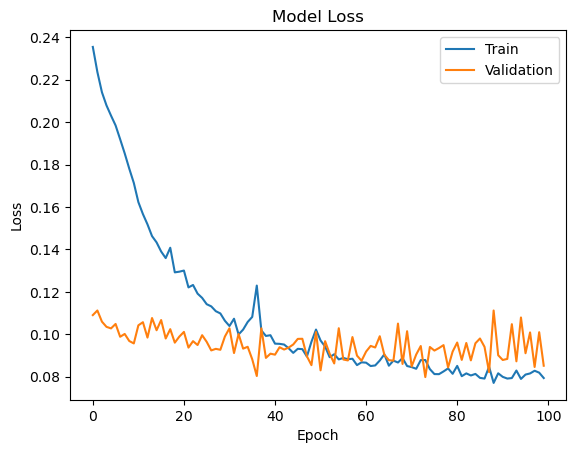

In [60]:
y2_predicted = model.predict(x2_test.reshape(x2_test.shape[0], x2_test.shape[1], 1)).flatten() * y2_train_std + y2_train_mean
y2_test = y2_test * y2_train_std + y2_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y2_test, y2_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y2_test, y2_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y2_test, y2_predicted))))
print('R2 score = ' + str(r2_score(y2_test, y2_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()